In [ ]:
from PIL import Image

def read_image_info(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            img_format = img.format
            mode = img.mode

            print("Image Path:", image_path)
            print("Dimensions (Width x Height):", width, "x", height)
            print("Format:", img_format)
            print("Mode:", mode)

    except FileNotFoundError:
        print("Error: Image file not found.")
    except Exception as e:
        print("An error occurred:", e)

image_path = r"C:\Users\Admin\Desktop\airlogo.png"
read_image_info(image_path)

Image Path: C:\Users\Admin\Desktop\airlogo.png
Dimensions (Width x Height): 900 x 672
Format: PNG
Mode: RGBA


In [ ]:
from PIL import Image

def hide_image(cover_path, hidden_path, output_path):
    cover_image = Image.open(cover_path)
    cover_pixels = cover_image.load()

    hidden_image = Image.open(hidden_path)
    hidden_pixels = hidden_image.load()

    if cover_image.size != hidden_image.size:
        print("Error: Cover and hidden images must have the same dimensions.")
        return

    output_image = Image.new('RGB', cover_image.size)
    output_pixels = output_image.load()

    for i in range(cover_image.size[0]):  # width
        for j in range(cover_image.size[1]):  # height
            cover_pixel = cover_pixels[i, j]
            hidden_pixel = hidden_pixels[i, j]

            output_pixels[i, j] = (
                (cover_pixel[0] & 0b11111110) | (hidden_pixel[0] >> 7),
                (cover_pixel[1] & 0b11111110) | (hidden_pixel[1] >> 7),
                (cover_pixel[2] & 0b11111110) | (hidden_pixel[2] >> 7)
            )

    output_image.save(output_path)
    print("Image hidden successfully!")

def extract_image(input_path, output_path):\
    input_image = Image.open(input_path)
    input_pixels = input_image.load()

    hidden_image = Image.new('RGB', input_image.size)
    hidden_pixels = hidden_image.load()

    for i in range(input_image.size[0]):  # width
        for j in range(input_image.size[1]):  # height
            input_pixel = input_pixels[i, j]

            hidden_pixels[i, j] = (
                (input_pixel[0] & 1) << 7,
                (input_pixel[1] & 1) << 7,
                (input_pixel[2] & 1) << 7
            )

    hidden_image.save(output_path)
    print("Hidden image extracted successfully!")

cover_image_path = r"C:\Users\Admin\Downloads\blue.jpeg"
hidden_image_path = r"C:\Users\Admin\Downloads\purple.jpeg"
output_image_path = r"C:\Users\Admin\Downloads\total.jpeg"

hide_image(cover_image_path, hidden_image_path, output_image_path)

extract_image(output_image_path, "extracted_hidden_image.png")

Image hidden successfully!
Hidden image extracted successfully!


Upload carrier image (will contain the hidden image):


Saving hello.bmp to hello (2).bmp

Upload secret image (to be hidden):


Saving sample_1280×853.bmp to sample_1280×853.bmp

Stego image (with hidden image):


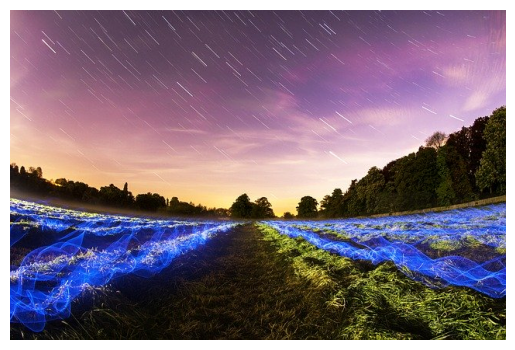


Extracted hidden image:


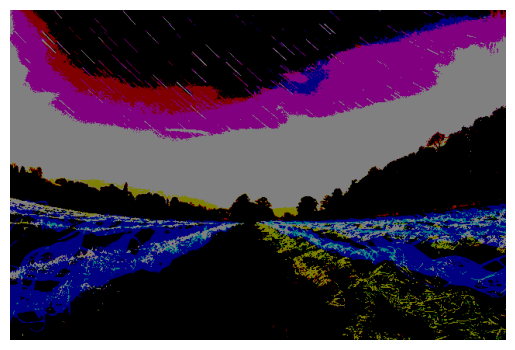

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

def upload_images():
    print("Upload carrier image (will contain the hidden image):")
    carrier = files.upload()
    print("\nUpload secret image (to be hidden):")
    secret = files.upload()
    return next(iter(carrier)), next(iter(secret))

def hide_image(carrier_path, secret_path):
    carrier = Image.open(carrier_path)
    secret = Image.open(secret_path).convert('RGB').resize(carrier.size)

    carrier_arr = np.array(carrier)
    secret_arr = np.array(secret)

    carrier_arr = (carrier_arr >> 1) << 1
    secret_bits = (secret_arr >> 7)
    stego_arr = carrier_arr | secret_bits

    return Image.fromarray(stego_arr)

def extract_image(stego_img):
    stego_arr = np.array(stego_img)

    extracted_arr = ((stego_arr & 1) << 7)
    return Image.fromarray(extracted_arr.astype(np.uint8))

carrier_path, secret_path = upload_images()

stego_image = hide_image(carrier_path, secret_path)
print("\nStego image (with hidden image):")
plt.imshow(stego_image)
plt.axis('off')
plt.show()

extracted_image = extract_image(stego_image)
print("\nExtracted hidden image:")
plt.imshow(extracted_image)
plt.axis('off')
plt.show()